# Scope Trace Integration Window Analysis

 This Python notebook is designed to analyze the trace scope.

In [3]:
#LIBRARIES
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time

/var/folders/_k/7vkx25w17_s1md3k9zt3c2_r0000gn/T/ipykernel_10893/3461898315.py:44: RuntimeWarning: invalid value encountered in double_scalars
  newarr[i][j]=array[count][j]/array[count+1][j]


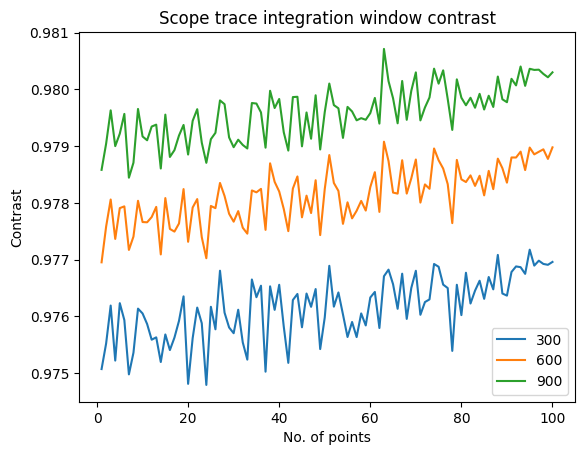

--- 3.2134850025177 seconds ---


In [4]:
start_time = time.time()

#USER VARS
num_of_dat=101 #input the number of .dat files that are going to be analyzed
num_of_peaks=2 #number of peaks in the .dat file
num_of_arrays=3
int_gaps=[300,600,900]
start=2000 #start point

#VARS - DO NOT CHANGE
array=np.zeros([num_of_peaks,num_of_dat])
for i in range(0,num_of_arrays-1):
    array=np.append(array,np.zeros([num_of_peaks,num_of_dat]),0)

#SUMS
for i in range(2,num_of_dat+1):
    
    #OFFSET VALUE BETWEEN PEAKS
    offset_val=int(round(((209.46+0.1+0.5*(i-1))/.0032),0))+start #finds offset, rounds and converts to int

    sums=np.zeros([num_of_peaks*num_of_arrays,1])
    filename="/Users/dylankawashiri/Downloads/T1_2_50u_manual/"+str(i)+"_wav.dat"
    data=pd.read_csv(filename, sep = ',').to_numpy() #if .CSV or .DAT separated by a non space value
    count=0
    for j in range(0,num_of_arrays):
        for k in range(start-1,start-1+int_gaps[j]):
            sums[count]=sums[count]+float(data[k][1])
        count+=1
        for l in range(offset_val,offset_val+int_gaps[j]):
            sums[count]=sums[count]+float(data[l][1])
        count+=1
    for m in range(0,num_of_arrays*num_of_peaks):
        array[m][i-1]=sums[m]

#CONTRAST
newarr=np.zeros([1,num_of_dat])
for i in range(0,num_of_arrays-1):
    newarr=np.append(newarr,np.zeros([1,num_of_dat]),0)
count=0
for i in range(0,num_of_arrays):
    for j in range(0,num_of_dat): 
        newarr[i][j]=array[count][j]/array[count+1][j]
    count+=2
        
#GRAPHING
for i in range(0,num_of_arrays):
    plt.plot(newarr[i],label=int_gaps[i])
plt.title("Scope trace integration window contrast");
plt.ylabel("Contrast");
plt.xlabel("No. of points");
plt.legend(loc="lower right")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))